# Rotten Tomatoes Movie Reviews

## Objective

Carry out a basic sentiment analysis using Python and provide a basic model to calculate the sentiment score

## Table of Contents
**1. Load and Check Data**

    1.1 load Data
    
    1.2 Check duplicates

**2. Data Exploration**

    2.1 Check Distribution    
**3. Data Modelling & Prediction**

    3.1 NLP Libraries for classification
    
    3.2 TextBlob Classification
         3.2.1 Prediction
         3.2.2 Confusion Matrix
         
    3.3 VADER Classification
         3.3.1 Prediction
         3.3.2 Confusion Matrix
    
    3.4 Logistic Regression Classification
         3.4.1 Prediction
         3.4.2 Confusion Matrix
    
    3.5 SVM Classification
         3.5.1 Prediction
         3.5.2 Confusion Matrix
    
    
**4. Conclusion**

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## 1. Load and check data

### 1.1 Load Data

In [4]:
train_path = 'data/02_processed/cat_train_sentence.csv'
df = pd.read_csv(train_path, sep=',')

In [5]:
df.head()

,sentence,sentiment
0,The Rock is destined to be the 21st Century 's...,4
1,The gorgeously elaborate continuation of `` Th...,5
2,Singer\/composer Bryan Adams contributes a sle...,4
3,You 'd think by now America would have had eno...,3
4,Yet the act is still charming here .,4


In [6]:
test_path = 'data/02_processed/cat_test.csv'
df_test = pd.read_csv(test_path, sep=',')

In [7]:
df_test

,sentence,sentiment
0,Effective but too-tepid biopic,3
1,If you sometimes like to go to the movies to h...,4
2,"Emerges as something rare , an issue movie tha...",5
3,The film provides some great insight into the ...,3
4,Offers that rare combination of entertainment ...,5
...,...,...
2205,An imaginative comedy\/thriller .,4
2206,"( A ) rare , beautiful film .",5
2207,( An ) hilarious romantic comedy .,5
2208,Never ( sinks ) into exploitation .,4


### 1.2 Check duplicate

In [8]:
df.groupby('sentiment').describe()

sentence                                                            \
             count unique                                                top   
sentiment                                                                      
1             1090   1090  A semi-autobiographical film that 's so sloppi...   
2             2215   2215  Resurrection has the dubious distinction of be...   
3             1623   1623  At once emotional and richly analytical , the ...   
4             2319   2319  A highly watchable , giggly little story with ...   
5             1287   1287  At least it 's a fairly impressive debut from ...   

                
          freq  
sentiment       
1            1  
2            1  
3            1  
4            1  
5            1

**no duplicate detected**

## 2. Data Exploration

### 2.1 Check distribution

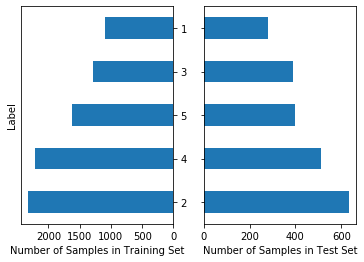

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey = True)

ax1.invert_xaxis()
ax1.yaxis.tick_right()

ax1 = df['sentiment'].value_counts(sort=True).plot(kind='barh', ax=ax1)
ax1.set_xlabel('Number of Samples in Training Set')
ax1.set_ylabel('Label')

ax2 = df_test['sentiment'].value_counts(sort=True).plot(kind='barh', ax=ax2)
ax2.set_xlabel('Number of Samples in Test Set')
ax2.set_ylabel('Label')

plt.show()

**Most training sample belongs to class 2 and 4. A sizable number of samples belongs to neutral class. about 12%-13 belonged to strongly negative class**

**Test sample almost have the same distribution as Training sample**

In [10]:
df['length'] = df['sentence'].apply(lambda x: len(x))

In [11]:
df = df.sort_values('length')
df.head(10)

,sentence,sentiment,length
8475,Eh .,3,4
593,Go .,3,4
4197,Wow .,4,5
5286,No. .,2,5
5284,Yes .,4,5
1270,Why ?,2,5
2038,A. . .,3,6
7666,Zoom !,4,6
7665,Bang !,3,6
335,Cool .,4,6


## 3. Data Modelling & Prediction

### 3.1 NLP Libraries for classification

**Rule-based methods:**
- TextBlob
- VADER

**Feature-based methods:**
- Logistic Regression
- Support Vector Machine (SVM)

In [12]:
from sklearn.metrics import confusion_matrix

### 3.2 TextBlob Classification

In [13]:
from src.Classifier import TextBlobSentiment

#### 3.2.1 Prediction

In [14]:
textblob_prediction = TextBlobSentiment().predict(train_path, test_path, lower_case = True)
textblob_prediction

,sentence,sentiment,pred
0,effective but too-tepid biopic,3,4
1,if you sometimes like to go to the movies to h...,4,4
2,"emerges as something rare , an issue movie tha...",5,4
3,the film provides some great insight into the ...,3,4
4,offers that rare combination of entertainment ...,5,3
...,...,...,...
2205,an imaginative comedy\/thriller .,4,4
2206,"( a ) rare , beautiful film .",5,4
2207,( an ) hilarious romantic comedy .,5,4
2208,never ( sinks ) into exploitation .,4,3


In [15]:
TextBlobSentiment().accuracy(textblob_prediction)

Accuracy: 28.371
Macro F1-score: 24.681


#### 3.2.2 Confusion Matrix

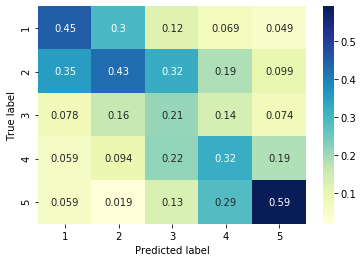

In [16]:
# Creates a confusion matrix
cm = confusion_matrix(textblob_prediction['sentiment'], textblob_prediction['pred']) 
cm = cm/cm.astype(np.float).sum(axis=0)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])

ax = sns.heatmap(cm_df, annot=True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Using confusion matrix above we can see the correct prediction from the diagonal cell.**

### 3.3 VADER Classification

In [17]:
from src.Classifier import VaderSentiment

#### 3.3.1 Prediction

In [18]:
vader_prediction = VaderSentiment().predict(train_path, test_path, lower_case = True)
vader_prediction

,sentence,sentiment,pred
0,effective but too-tepid biopic,3,4
1,if you sometimes like to go to the movies to h...,4,5
2,"emerges as something rare , an issue movie tha...",5,5
3,the film provides some great insight into the ...,3,5
4,offers that rare combination of entertainment ...,5,4
...,...,...,...
2205,an imaginative comedy\/thriller .,4,3
2206,"( a ) rare , beautiful film .",5,5
2207,( an ) hilarious romantic comedy .,5,5
2208,never ( sinks ) into exploitation .,4,3


In [19]:
VaderSentiment().accuracy(vader_prediction)

Accuracy: 31.538
Macro F1-score: 31.322


#### 3.3.2 Confusion Matrix

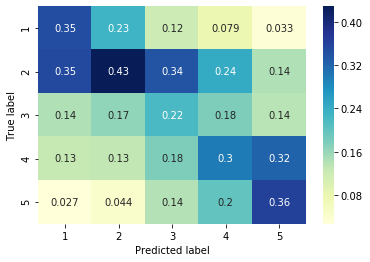

In [20]:
# Creates a confusion matrix
cm = confusion_matrix(vader_prediction['sentiment'], vader_prediction['pred']) 
cm = cm/cm.astype(np.float).sum(axis=0)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])

ax = sns.heatmap(cm_df, annot=True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**From the confusion matrix above we can see the correct prediction from the diagonal cell.**

### 3.4 Logistic Regression Classification

In [21]:
from src.Classifier import LogisticRegressionSentiment

#### 3.4.1 Prediction

In [22]:
reglog_prediction = LogisticRegressionSentiment().predict(train_path, test_path, lower_case = True)
reglog_prediction

,sentence,sentiment,pred
0,effective but too-tepid biopic,3,4
1,if you sometimes like to go to the movies to h...,4,4
2,"emerges as something rare , an issue movie tha...",5,4
3,the film provides some great insight into the ...,3,4
4,offers that rare combination of entertainment ...,5,4
...,...,...,...
2205,an imaginative comedy\/thriller .,4,4
2206,"( a ) rare , beautiful film .",5,5
2207,( an ) hilarious romantic comedy .,5,5
2208,never ( sinks ) into exploitation .,4,2


In [23]:
LogisticRegressionSentiment().accuracy(reglog_prediction)

Accuracy: 41.086
Macro F1-score: 33.364


#### 3.4.2 Confusion Matrix

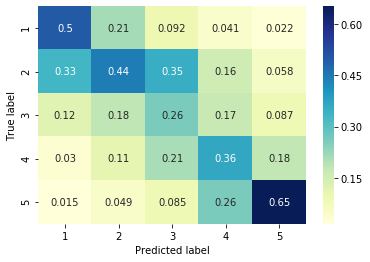

In [25]:
# Creates a confusion matrix
cm = confusion_matrix(reglog_prediction['sentiment'], reglog_prediction['pred']) 
cm = cm/cm.astype(np.float).sum(axis=0)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])

ax = sns.heatmap(cm_df, annot=True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 3.5 SVM Classification

In [17]:
from src.Classifier import SVMSentiment

#### 3.5.1 Prediction

In [18]:
svm_prediction = SVMSentiment().predict(train_path, test_path, lower_case = False)
svm_prediction

,sentence,sentiment,pred
0,Effective but too-tepid biopic,3,2
1,If you sometimes like to go to the movies to h...,4,4
2,"Emerges as something rare , an issue movie tha...",5,5
3,The film provides some great insight into the ...,3,5
4,Offers that rare combination of entertainment ...,5,5
...,...,...,...
2205,An imaginative comedy\/thriller .,4,4
2206,"( A ) rare , beautiful film .",5,5
2207,( An ) hilarious romantic comedy .,5,5
2208,Never ( sinks ) into exploitation .,4,2


In [19]:
SVMSentiment().accuracy(svm_prediction)

Accuracy: 41.584
Macro F1-score: 38.295


In [20]:
svm_prediction.to_csv('data/03_model_output/svm_prediction.csv')

#### 3.5.2 Confusion Matrix

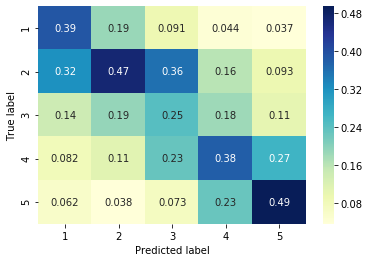

In [28]:
# Creates a confusion matrix
cm = confusion_matrix(svm_prediction['sentiment'], svm_prediction['pred']) 
cm = cm/cm.astype(np.float).sum(axis=0)

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['1','2','3','4','5'], 
                     columns = ['1','2','3','4','5'])

ax = sns.heatmap(cm_df, annot=True, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 4. Conclusion
On average our models are about **37.88% accurate**.  It's quite low, While this may mean that the machine cannot predict every comments with 100% accuracy. It can really depend on the data and how it has been processed.

Out of the 4 used in this project, the most **accurate was the Support Vector Machine (SVM)**, with accuracy of 41.58 %

SVM also has the **highest F1 score**, with f1-score of 38.30%, which means that it defines a relationship between Recall and Precision of a particular model. F1 Scores might be a better measure to use if we need to seek a balance between Precision and Recall and if there is an uneven class distribution (a large number of Actual Negatives).